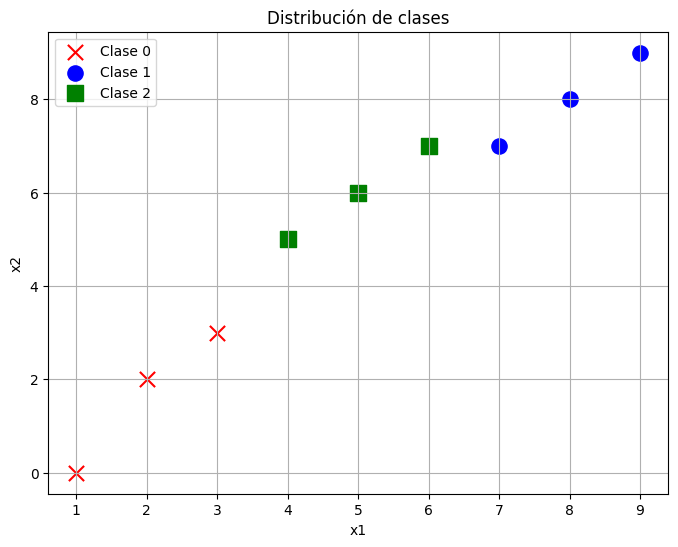

Época 0, Pérdida: 6.1416, Precisión: 0.3333


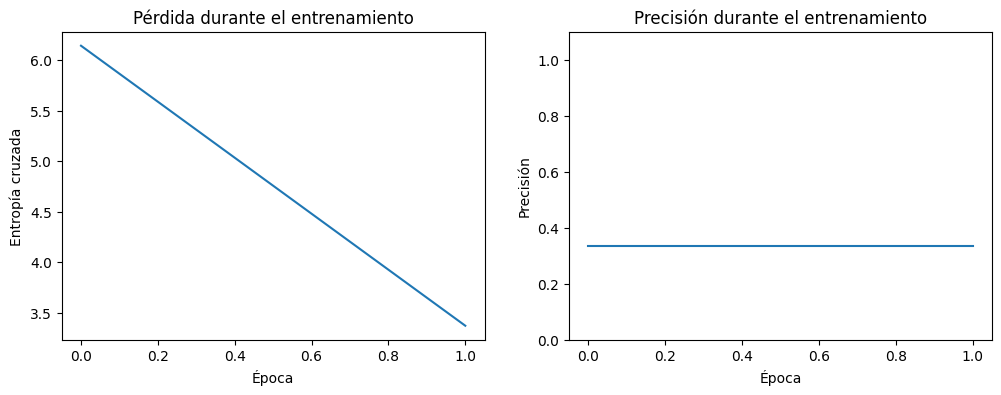


Matriz de confusión:

C[0  1  2]
[[0. 2. 1.]
 [0. 3. 0.]
 [0. 0. 3.]]

Precisión final: 66.67%


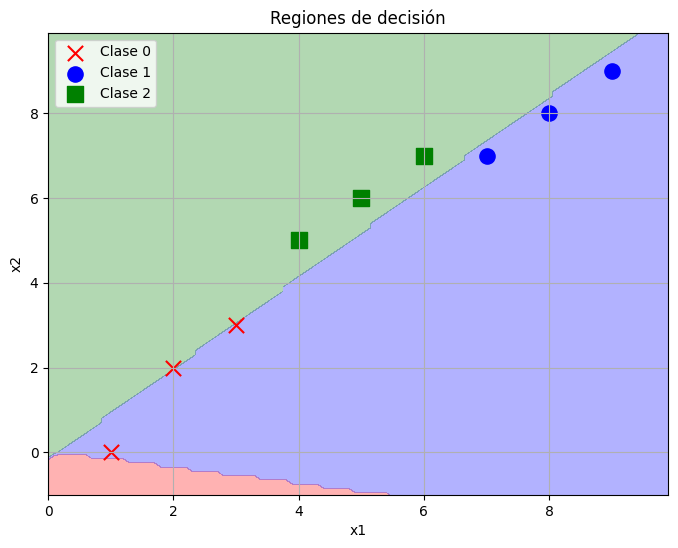

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada
individuo = np.array([[1, 0], [2, 2], [3, 3], [7, 7], [8, 8], [9, 9], [4, 5], [5, 6], [6, 7]])
clases = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])  # 3 clases: 0, 1, 2

# Visualización de los datos
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
markers = ['x', 'o', 's']
for class_id in range(3):
    plt.scatter(individuo[clases == class_id, 0], 
               individuo[clases == class_id, 1], 
               marker=markers[class_id], s=120, color=colors[class_id],
               label=f'Clase {class_id}')
plt.title("Distribución de clases")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

# Función de activación ReLU (para capas ocultas)
def relu(x):
    return np.maximum(0, x)

def relu_derivada(x):
    return (x > 0).astype(float)

# Función Softmax (para capa de salida)
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Para estabilidad numérica
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Función de pérdida: Entropía cruzada categórica
def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    return loss

# Arquitectura de la red
input_size = 2
hidden_size = 4  # Neuronas en capa oculta
output_size = 3  # 3 clases de salida

# Inicialización de pesos (Xavier/Glorot)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2./input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2./hidden_size)
b2 = np.zeros((1, output_size))

# Hiperparámetros
learning_rate = 0.1
epochs = 2
batch_size = 3

# Entrenamiento
loss_history = []
accuracy_history = []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(individuo, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    probs = softmax(z2)
    
    # Cálculo de pérdida
    loss = cross_entropy_loss(probs, clases)
    loss_history.append(loss)
    
    # Cálculo de precisión
    predictions = np.argmax(probs, axis=1)
    accuracy = np.mean(predictions == clases)
    accuracy_history.append(accuracy)
    
    # Backward pass
    m = individuo.shape[0]
    dz2 = probs
    dz2[range(m), clases] -= 1
    dz2 /= m
    
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)
    
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivada(z1)
    
    dW1 = np.dot(individuo.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)
    
    # Actualización de pesos
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    if epoch % 100 == 0:
        print(f"Época {epoch}, Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}")

# Gráficas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Entropía cruzada')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.ylim(0, 1.1)
plt.show()

# Evaluación final
z1 = np.dot(individuo, W1) + b1
a1 = relu(z1)
z2 = np.dot(a1, W2) + b2
probs = softmax(z2)
predictions = np.argmax(probs, axis=1)

# Matriz de confusión
conf_matrix = np.zeros((3, 3))
for true, pred in zip(clases, predictions):
    conf_matrix[true, pred] += 1

print("\nMatriz de confusión:")
print("\nC[0  1  2]")  
print(conf_matrix)

# Precisión final
final_accuracy = np.mean(predictions == clases)
print(f"\nPrecisión final: {final_accuracy*100:.2f}%")

# Visualización de regiones de decisión
x_min, x_max = individuo[:, 0].min() - 1, individuo[:, 0].max() + 1
y_min, y_max = individuo[:, 1].min() - 1, individuo[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = np.dot(relu(np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-0.5, 0.5, 1.5, 2.5], colors=colors)
for class_id in range(3):
    plt.scatter(individuo[clases == class_id, 0], 
               individuo[clases == class_id, 1], 
               marker=markers[class_id], s=120, color=colors[class_id],
               label=f'Clase {class_id}')
plt.title("Regiones de decisión")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()